# Logging Metrics

In [1]:
from mlflow_for_ml_dev.experiments.exp_utils import get_or_create_experiment
import mlflow

In [2]:
experiment = get_or_create_experiment("Default")

In [3]:
with mlflow.start_run(run_name="logging_metrics", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging a single metric
    mlflow.log_metric("m1", 2.0, step=0)

    # logging multiple metrics
    mlflow.log_metrics({"m2": 3.0, "m3": 4.0})

Run ID: 1f8c94d4e91a4c2a88ff91da53820821


In [4]:
with mlflow.start_run(run_name="logging_metrics", run_id=run.info.run_id, experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging a single metric
    mlflow.log_metric("m1", 2.0, step=1)

    # logging multiple metrics
    mlflow.log_metrics({"m2": 3.0, "m3": 4.0})

Run ID: 1f8c94d4e91a4c2a88ff91da53820821


In [5]:
client = mlflow.MlflowClient()

In [6]:
client.get_metric_history(run.info.run_id, "m1")

[<Metric: key='m1', step=0, timestamp=1711726001621, value=2.0>,
 <Metric: key='m1', step=1, timestamp=1711726001643, value=2.0>]

# Logging Parameters

In [7]:
with mlflow.start_run(run_name="logging_params", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging a single parameter
    mlflow.log_param("p1", 2.0)

    # logging multiple parameters
    mlflow.log_params({"p2": 3.0, "p3": 4.0})

Run ID: 0a18895d6b2b4255ab6c5e51c0b3dc89


# Logging Dict

In [8]:
with mlflow.start_run(run_name="logging_dict", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging a dictionary
    mlflow.log_dict(dictionary={"m1": 2.0, "m2": 3.0, "m3": 4.0}, artifact_file="files/metrics.json")

Run ID: 07ecd0d689b74c2d9737d55f1420cd88


In [9]:
with mlflow.start_run(run_name="logging_dict", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging a dictionary
    mlflow.log_dict(dictionary={"m1": 2.0, "m2": 3.0, "m3": 4.0}, artifact_file="files/metrics.yaml")

Run ID: 4cccc15f1a6845ae88fa7cf4a4e837ea


# Logging Artifacts

In [10]:
with mlflow.start_run(run_name="logging_artifact", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging an artifact
    mlflow.log_artifact(local_path="../../images/mlflow_run.jpeg",artifact_path="images")

Run ID: e2b866f57579464aa47692d0b21a45ee


In [11]:
with mlflow.start_run(run_name="logging_artifacts", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging an artifact
    mlflow.log_artifacts(local_dir="../../images",artifact_path="images")

Run ID: 0a3b860fbfe045d5a02ff540daa685fa


# Logging Figure

Log a figure as an artifact. The following figure objects are supported:

* matplotlib.figure.Figure

* plotly.graph_objects.Figure

Run ID: cbb24ed182084abbbe7220e579069728


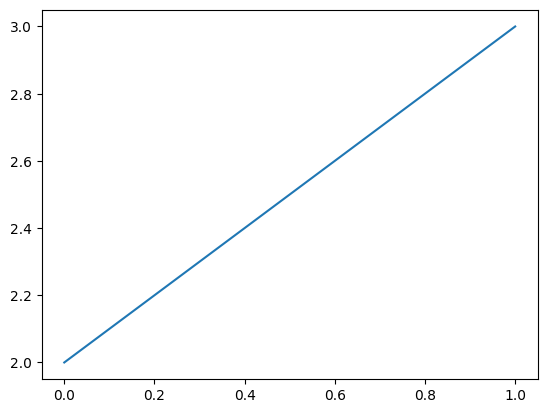

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot([0, 1], [2, 3])

with mlflow.start_run(run_name="logging_figure", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging a figure
    mlflow.log_figure(fig, artifact_file="figure.png")


# Logging Image

Log an image as an artifact. The following image objects are supported:

* numpy.ndarray

* PIL.Image.Image

In [13]:
import numpy as np

image = np.random.randint(0, 256, size=(100, 100, 3), dtype=np.uint8)

with mlflow.start_run(run_name="logging_image", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging an image
    mlflow.log_image(image, artifact_file="image.png")


Run ID: 27c0842a92df46b6ae65ffec13017b08


# Logging Table

Log a table to MLflow Tracking as a JSON artifact. If the artifact_file already exists in the run, the data would be appended to the existing artifact_file.

* data – Dictionary or pandas.DataFrame to log.

* artifact_file – The run-relative artifact file path in posixpath format to which the table is saved (e.g. “dir/file.json”).

In [14]:
import mlflow

table_dict = {
    "inputs": ["What is MLflow?", "What is Databricks?"],
    "outputs": ["MLflow is ...", "Databricks is ..."],
    "toxicity": [0.0, 0.0],
}
with mlflow.start_run(run_name="logging_table", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # Log the dictionary as a table
    mlflow.log_table(data=table_dict, artifact_file="results.json")

Run ID: 08e7fbe0d66d4f40bed87a46b5511de1


# Logging Text

Log text as an artifact.

In [15]:
with mlflow.start_run(run_name="logging_text", experiment_id=experiment.experiment_id) as run:

    print("Run ID:", run.info.run_id)
    # Log text to a file under the run's root artifact directory
    mlflow.log_text("text1", "file1.txt")

    # Log text in a subdirectory of the run's root artifact directory
    mlflow.log_text("text2", "dir/file2.txt")

    # Log HTML text
    mlflow.log_text("<h1>header</h1>", "index.html")

Run ID: c8d5be9cfc4a4feca31ef8d3cb63ac64
